# Importing libraries

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets

In [46]:
customers = pd.read_csv("data/Customers.csv")
print("Customers Dataset:")
display(customers.head())

products = pd.read_csv("data/Products.csv")
print("Products Dataset:")
display(products.head())

transactions = pd.read_csv("data/Transactions.csv")
print("Transactions Dataset:")
display(transactions.head())


Customers Dataset:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Dataset:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Dataset:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## check for null values

In [12]:
print("Missing values for Customers:")
print(customers.isnull().sum())

print("\nMissing values for Products:")
print(products.isnull().sum())

print("\nMissing values for Transactions:")
print(transactions.isnull().sum())

Missing values for Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values for Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values for Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## drop duplicate values (if found)

In [13]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

## merging datasets

In [18]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Customers by region

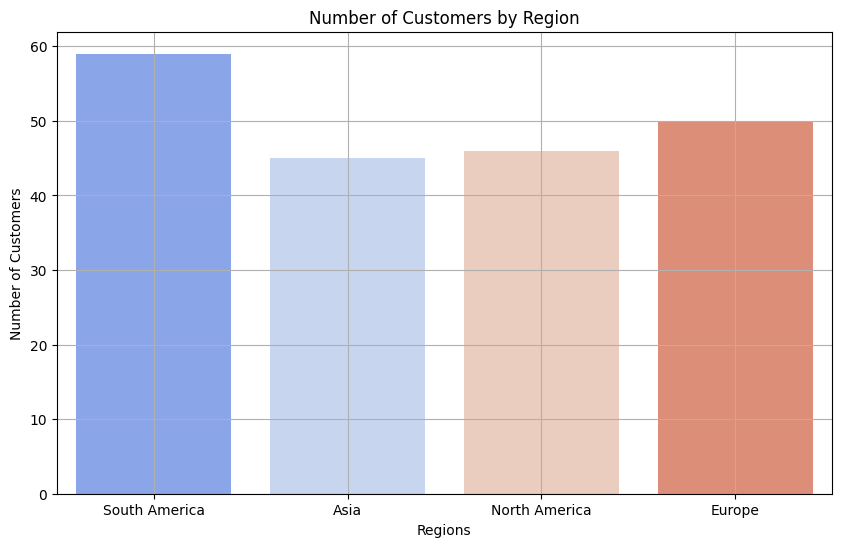

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', hue='Region',palette='coolwarm')
plt.title('Number of Customers by Region')
plt.xlabel('Regions')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

# Transaction value over region

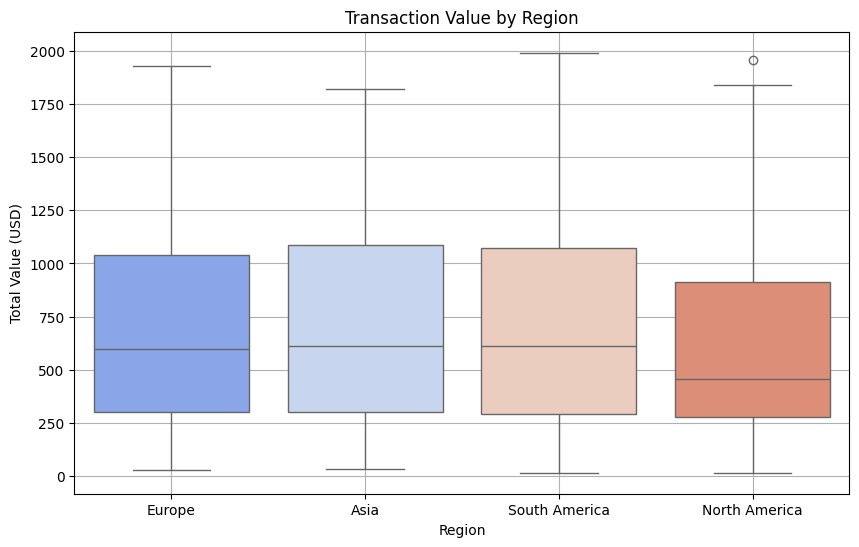

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data, hue='Region', palette='coolwarm')
plt.title("Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Total Value (USD)")
plt.grid()
plt.show()

# Monthly Revenue Trends

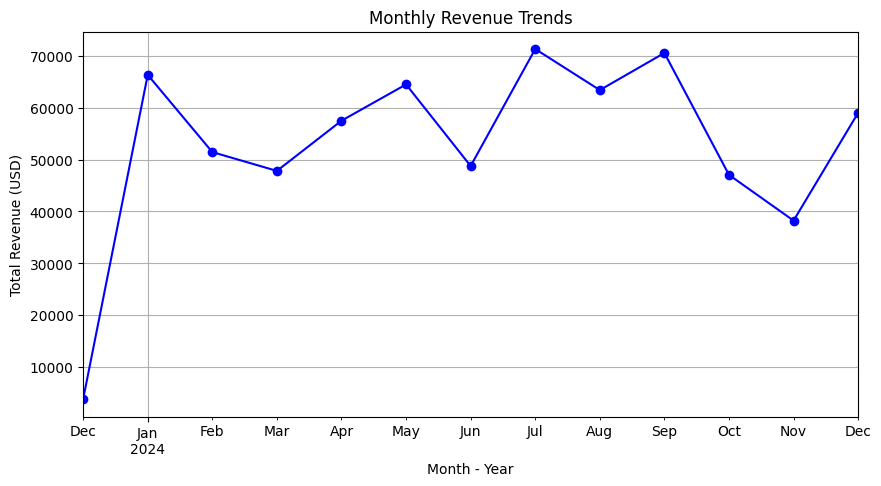

In [33]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
transactions['MonthYear'] = transactions['TransactionDate'].dt.to_period('M')

monthly_revenue = transactions.groupby('MonthYear')['TotalValue'].sum()

monthly_revenue.plot(kind='line', figsize=(10, 5), title='Monthly Revenue Trends', marker='o', color='blue')
plt.xlabel('Month - Year')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()

# Distribution of Transaction per Customer

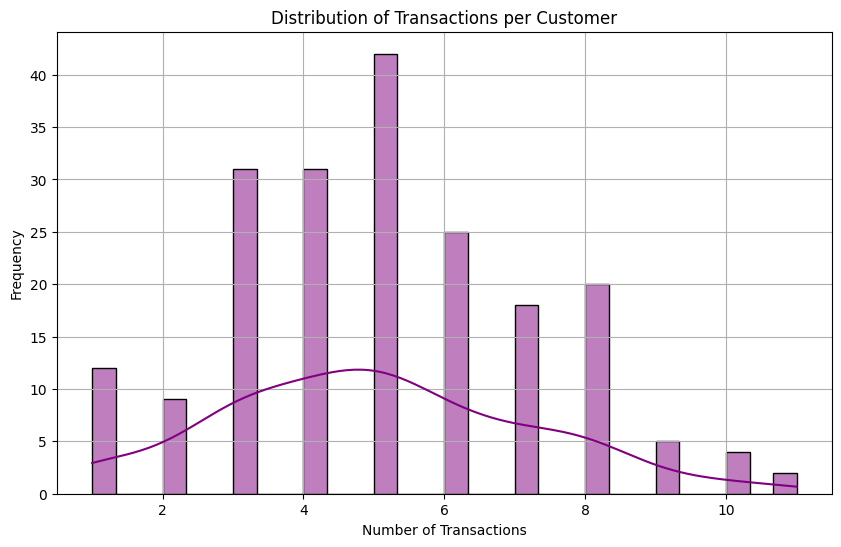

In [38]:
customer_transactions = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=30, kde=True, color='purple')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Product Price Distribution

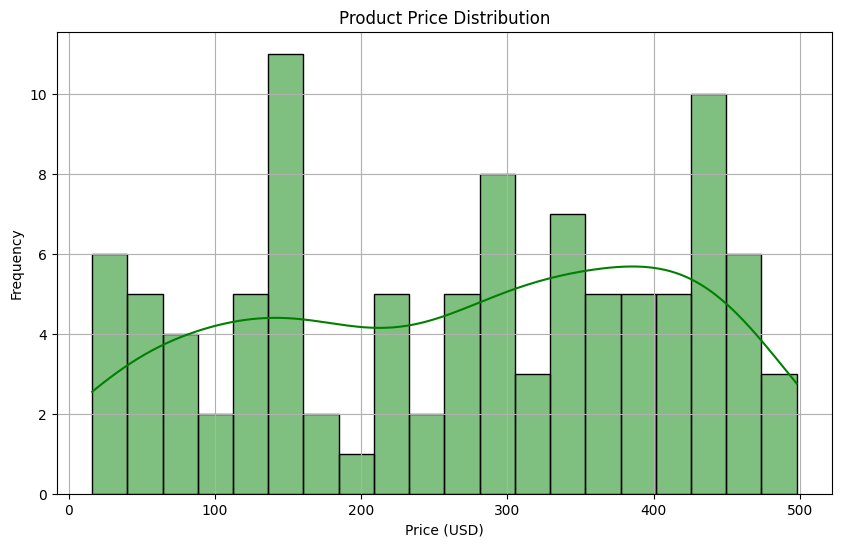

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='green')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Customer signup trends

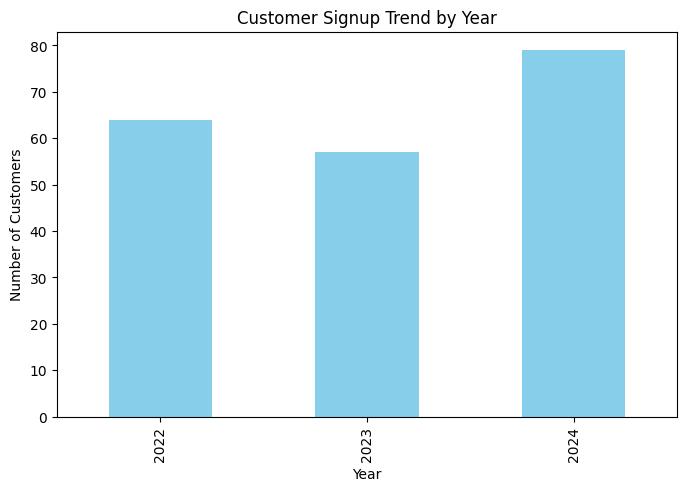

In [44]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

customers['Year'] = customers['SignupDate'].dt.year

signup_trend = customers['Year'].value_counts().sort_index()

signup_trend.plot(kind='bar', title='Customer Signup Trend by Year', figsize=(8, 5), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.show()
